# Reinforcement Learning Introduction - Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, FancyBboxPatch
import warnings

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. WHAT IS REINFORCEMENT LEARNING?

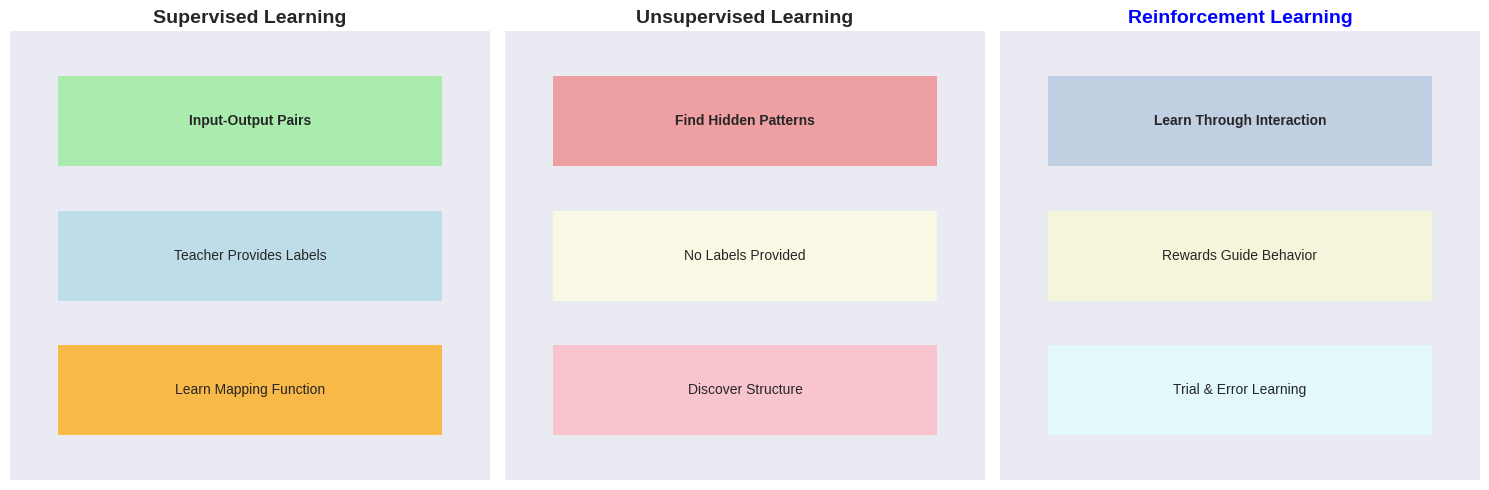

In [2]:
# Visualizing the learning paradigms comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Supervised Learning
ax1 = axes[0]
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.add_patch(Rectangle((1, 7), 8, 2, facecolor='lightgreen', alpha=0.7))
ax1.add_patch(Rectangle((1, 4), 8, 2, facecolor='lightblue', alpha=0.7))
ax1.add_patch(Rectangle((1, 1), 8, 2, facecolor='orange', alpha=0.7))
ax1.text(5, 8, 'Input-Output Pairs', ha='center', va='center', fontsize=10, weight='bold')
ax1.text(5, 5, 'Teacher Provides Labels', ha='center', va='center', fontsize=10)
ax1.text(5, 2, 'Learn Mapping Function', ha='center', va='center', fontsize=10)
ax1.set_title('Supervised Learning', fontsize=14, weight='bold')
ax1.set_xticks([])
ax1.set_yticks([])

# Unsupervised Learning
ax2 = axes[1]
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.add_patch(Rectangle((1, 7), 8, 2, facecolor='lightcoral', alpha=0.7))
ax2.add_patch(Rectangle((1, 4), 8, 2, facecolor='lightyellow', alpha=0.7))
ax2.add_patch(Rectangle((1, 1), 8, 2, facecolor='lightpink', alpha=0.7))
ax2.text(5, 8, 'Find Hidden Patterns', ha='center', va='center', fontsize=10, weight='bold')
ax2.text(5, 5, 'No Labels Provided', ha='center', va='center', fontsize=10)
ax2.text(5, 2, 'Discover Structure', ha='center', va='center', fontsize=10)
ax2.set_title('Unsupervised Learning', fontsize=14, weight='bold')
ax2.set_xticks([])
ax2.set_yticks([])

# Reinforcement Learning
ax3 = axes[2]
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10)
ax3.add_patch(Rectangle((1, 7), 8, 2, facecolor='lightsteelblue', alpha=0.7))
ax3.add_patch(Rectangle((1, 4), 8, 2, facecolor='lightgoldenrodyellow', alpha=0.7))
ax3.add_patch(Rectangle((1, 1), 8, 2, facecolor='lightcyan', alpha=0.7))
ax3.text(5, 8, 'Learn Through Interaction', ha='center', va='center', fontsize=10, weight='bold')
ax3.text(5, 5, 'Rewards Guide Behavior', ha='center', va='center', fontsize=10)
ax3.text(5, 2, 'Trial & Error Learning', ha='center', va='center', fontsize=10)
ax3.set_title('Reinforcement Learning', fontsize=14, weight='bold', color='blue')
ax3.set_xticks([])
ax3.set_yticks([])

plt.tight_layout()
plt.show()

# 2. THE AGENT-ENVIRONMENT INTERFACE

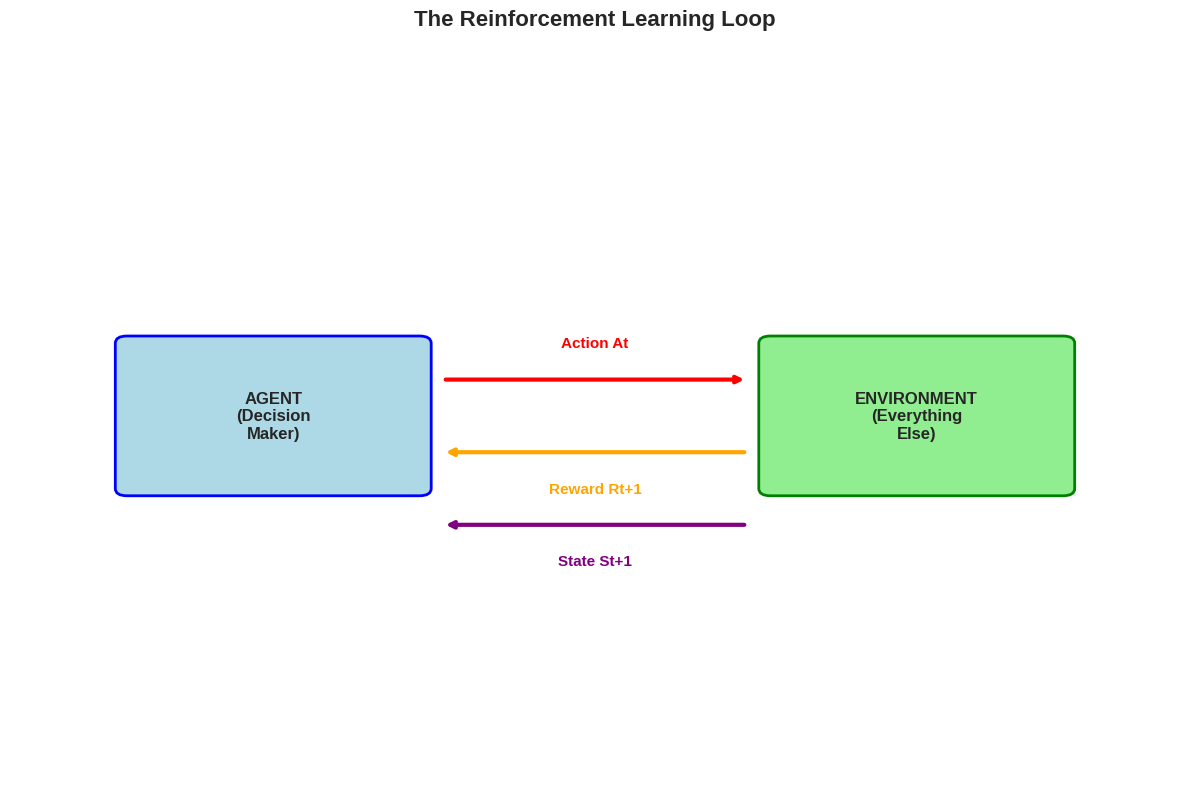

In [3]:
# Visualizing the Agent-Environment Loop
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Agent box
agent_box = FancyBboxPatch((1, 4), 2.5, 2, boxstyle="round,pad=0.1", 
                          facecolor='lightblue', edgecolor='blue', linewidth=2)
ax.add_patch(agent_box)
ax.text(2.25, 5, 'AGENT\n(Decision\nMaker)', ha='center', va='center', 
        fontsize=12, weight='bold')

# Environment box
env_box = FancyBboxPatch((6.5, 4), 2.5, 2, boxstyle="round,pad=0.1", 
                        facecolor='lightgreen', edgecolor='green', linewidth=2)
ax.add_patch(env_box)
ax.text(7.75, 5, 'ENVIRONMENT\n(Everything\nElse)', ha='center', va='center', 
        fontsize=12, weight='bold')

# Arrows and labels
# Action arrow
ax.annotate('', xy=(6.3, 5.5), xytext=(3.7, 5.5), 
            arrowprops=dict(arrowstyle='->', lw=3, color='red'))
ax.text(5, 6, 'Action At', ha='center', va='center', fontsize=11, 
        weight='bold', color='red')

# Reward arrow
ax.annotate('', xy=(3.7, 4.5), xytext=(6.3, 4.5), 
            arrowprops=dict(arrowstyle='->', lw=3, color='orange'))
ax.text(5, 4, 'Reward Rt+1', ha='center', va='center', fontsize=11, 
        weight='bold', color='orange')

# State arrow
ax.annotate('', xy=(3.7, 3.5), xytext=(6.3, 3.5), 
            arrowprops=dict(arrowstyle='->', lw=3, color='purple'))
ax.text(5, 3, 'State St+1', ha='center', va='center', fontsize=11, 
        weight='bold', color='purple')

ax.set_title('The Reinforcement Learning Loop', fontsize=16, weight='bold', pad=20)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.tight_layout()
plt.show()

# 3. GRID WORLD EXAMPLE - PRACTICAL DEMONSTRATION

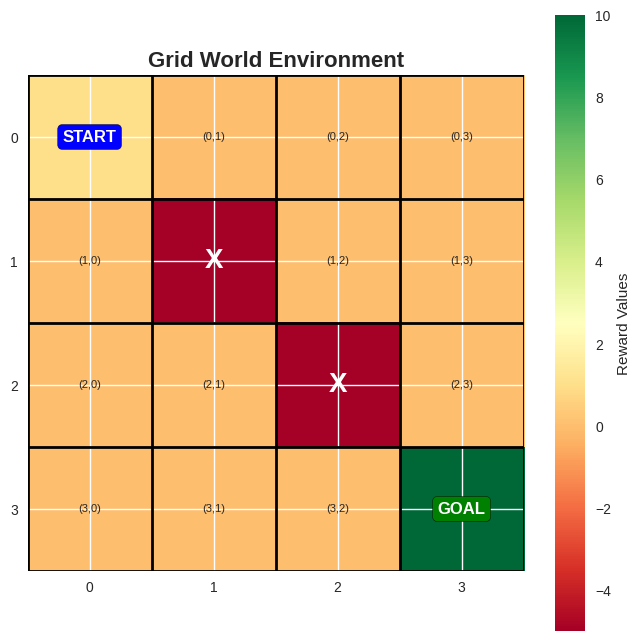

In [4]:
# Create a simple 4x4 grid world
grid_size = 4
grid = np.zeros((grid_size, grid_size))

# Define special states
START_STATE = (0, 0)
GOAL_STATE = (3, 3)
OBSTACLE_STATES = [(1, 1), (2, 2)]

# Mark special states in grid
grid[START_STATE] = 1  # Start
grid[GOAL_STATE] = 10  # Goal
for obs in OBSTACLE_STATES:
    grid[obs] = -5  # Obstacles

# Visualize the grid world
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(grid, cmap='RdYlGn', vmin=-5, vmax=10)

# Add grid lines
for i in range(grid_size + 1):
    ax.axhline(i - 0.5, color='black', linewidth=2)
    ax.axvline(i - 0.5, color='black', linewidth=2)

# Add labels
for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) == START_STATE:
            ax.text(j, i, 'START', ha='center', va='center', fontsize=12, 
                   weight='bold', color='white', bbox=dict(boxstyle='round', facecolor='blue'))
        elif (i, j) == GOAL_STATE:
            ax.text(j, i, 'GOAL', ha='center', va='center', fontsize=12, 
                   weight='bold', color='white', bbox=dict(boxstyle='round', facecolor='green'))
        elif (i, j) in OBSTACLE_STATES:
            ax.text(j, i, 'X', ha='center', va='center', fontsize=20, 
                   weight='bold', color='white')
        else:
            ax.text(j, i, f'({i},{j})', ha='center', va='center', fontsize=8)

ax.set_title('Grid World Environment', fontsize=16, weight='bold')
ax.set_xticks(range(grid_size))
ax.set_yticks(range(grid_size))
plt.colorbar(im, ax=ax, label='Reward Values')
plt.show()

# 4. POLICIES - HOW AGENTS MAKE DECISIONS

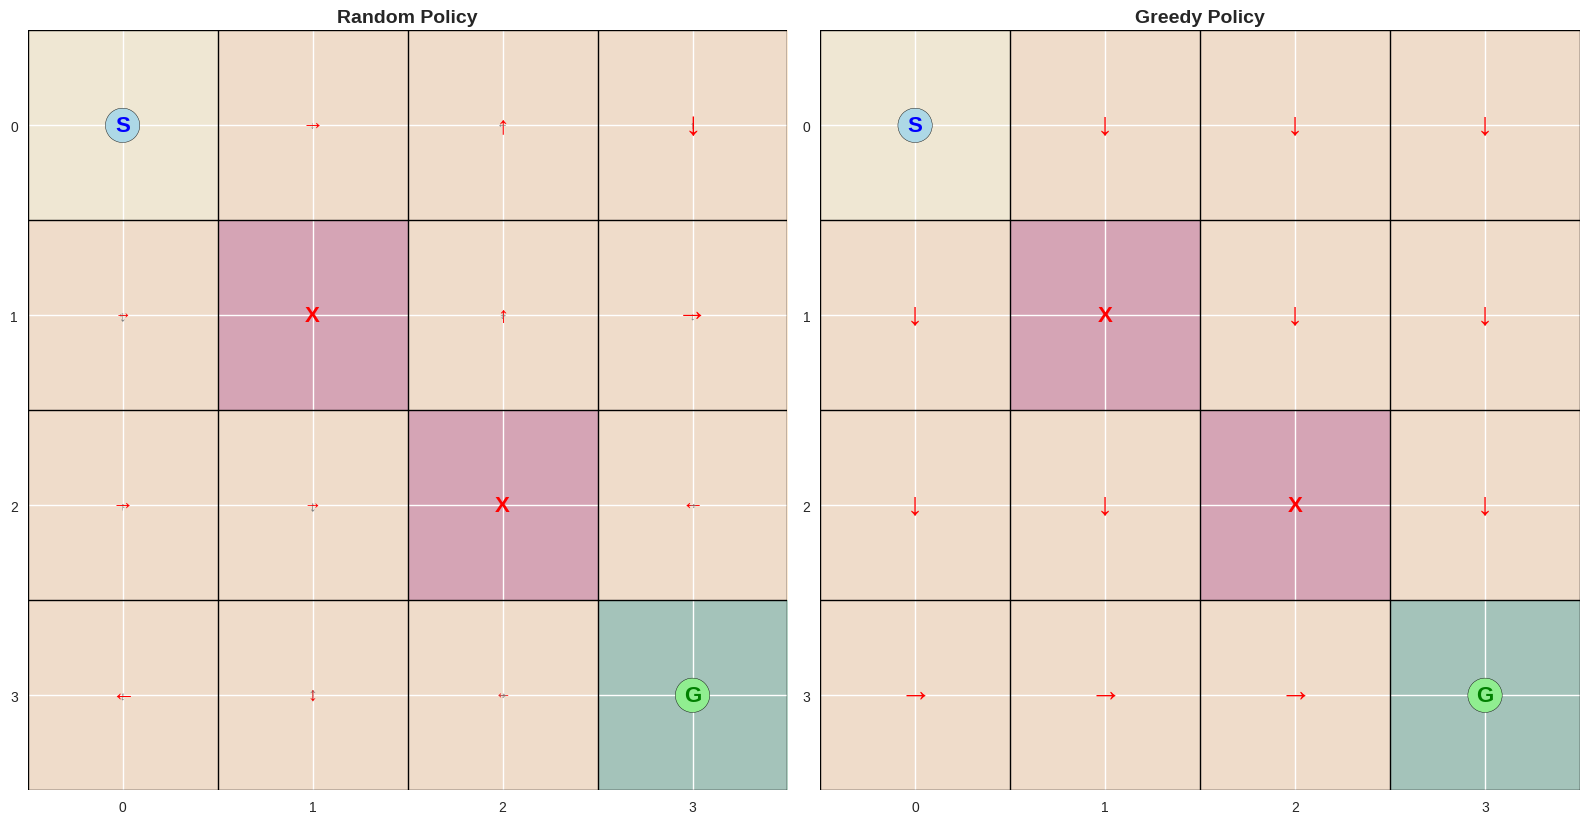

In [5]:
# Generate synthetic policy data for visualization
states = [(i, j) for i in range(grid_size) for j in range(grid_size) 
          if (i, j) not in OBSTACLE_STATES]
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
action_symbols = {'UP': '↑', 'DOWN': '↓', 'LEFT': '←', 'RIGHT': '→'}

# Create a random policy
np.random.seed(0)
random_policy = {}
for state in states:
    if state != GOAL_STATE:
        probs = np.random.dirichlet([1, 1, 1, 1])  # Random probabilities
        random_policy[state] = dict(zip(actions, probs))

# Create a greedy policy (towards goal)
greedy_policy = {}
for state in states:
    if state != GOAL_STATE:
        i, j = state
        goal_i, goal_j = GOAL_STATE
        
        # Choose action that moves closer to goal
        if i < goal_i:
            best_action = 'DOWN'
        elif i > goal_i:
            best_action = 'UP'
        elif j < goal_j:
            best_action = 'RIGHT'
        else:
            best_action = 'LEFT'
            
        # Create probabilities (0.7 for best action, 0.1 for others)
        probs = [0.1, 0.1, 0.1, 0.1]
        probs[actions.index(best_action)] = 0.7
        greedy_policy[state] = dict(zip(actions, probs))

# Visualize both policies
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for idx, (policy, title) in enumerate([(random_policy, 'Random Policy'), 
                                      (greedy_policy, 'Greedy Policy')]):
    ax = axes[idx]
    ax.imshow(grid, cmap='RdYlGn', vmin=-5, vmax=10, alpha=0.3)
    
    # Add grid lines
    for i in range(grid_size + 1):
        ax.axhline(i - 0.5, color='black', linewidth=1)
        ax.axvline(i - 0.5, color='black', linewidth=1)
    
    # Show policy arrows
    for state in states:
        if state != GOAL_STATE:
            i, j = state
            for action, prob in policy[state].items():
                if prob > 0.15:  # Only show significant probabilities
                    symbol = action_symbols[action]
                    size = int(prob * 100)
                    color = 'red' if prob == max(policy[state].values()) else 'gray'
                    ax.text(j, i, symbol, ha='center', va='center', 
                           fontsize=size//3, weight='bold', color=color)
    
    # Mark special states
    ax.text(START_STATE[1], START_STATE[0], 'S', ha='center', va='center', 
           fontsize=16, weight='bold', color='blue', 
           bbox=dict(boxstyle='circle', facecolor='lightblue'))
    ax.text(GOAL_STATE[1], GOAL_STATE[0], 'G', ha='center', va='center', 
           fontsize=16, weight='bold', color='green',
           bbox=dict(boxstyle='circle', facecolor='lightgreen'))
    
    for obs in OBSTACLE_STATES:
        ax.text(obs[1], obs[0], 'X', ha='center', va='center', 
               fontsize=16, weight='bold', color='red')
    
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_xticks(range(grid_size))
    ax.set_yticks(range(grid_size))

plt.tight_layout()
plt.show()

# 5. VALUE FUNCTIONS - EVALUATING STATES

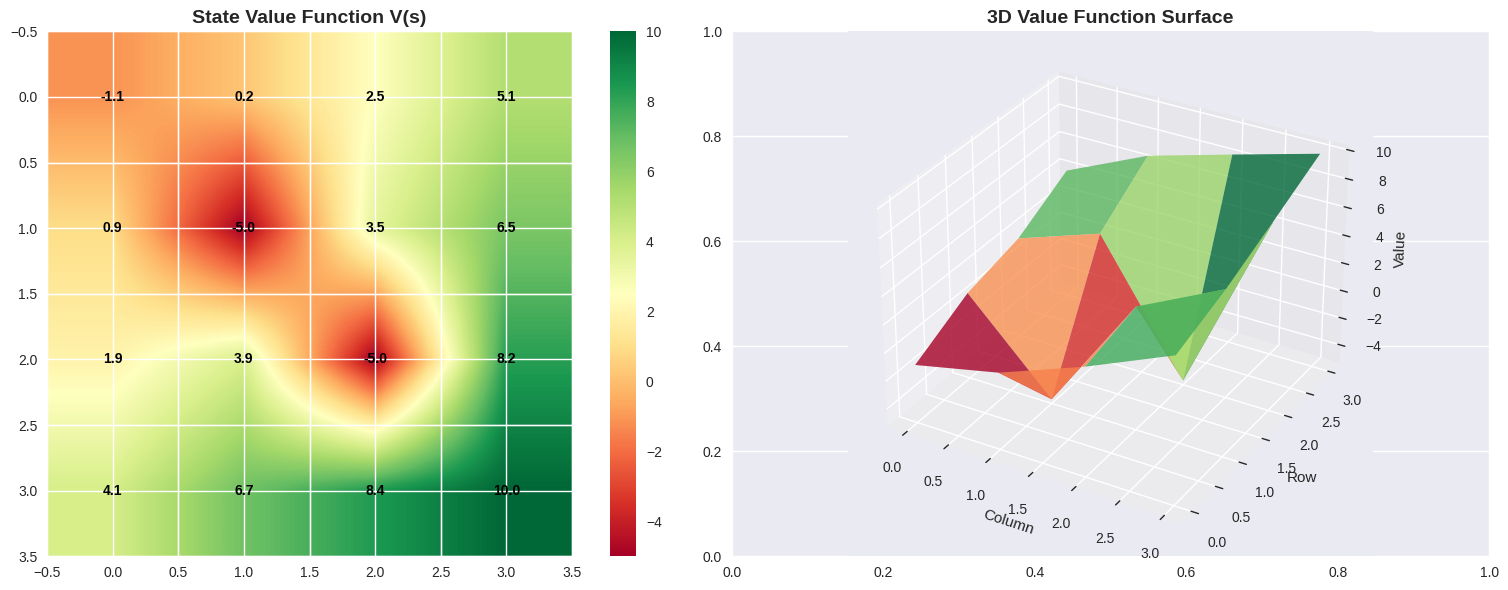

In [6]:
# Generate synthetic value function data
np.random.seed(0)

# Create value function for our grid world
# Values should generally increase as we get closer to the goal
value_function = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) == GOAL_STATE:
            value_function[i, j] = 10  # Goal state has highest value
        elif (i, j) in OBSTACLE_STATES:
            value_function[i, j] = -5  # Obstacles have negative value
        else:
            # Value decreases with Manhattan distance from goal
            distance = abs(i - GOAL_STATE[0]) + abs(j - GOAL_STATE[1])
            value_function[i, j] = 10 - 2 * distance + np.random.normal(0, 0.5)

# Visualize value function
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap
im1 = ax1.imshow(value_function, cmap='RdYlGn', interpolation='bilinear')
ax1.set_title('State Value Function V(s)', fontsize=14, weight='bold')

# Add value labels
for i in range(grid_size):
    for j in range(grid_size):
        text = ax1.text(j, i, f'{value_function[i, j]:.1f}', 
                       ha='center', va='center', color='black', weight='bold')

# Add grid
for i in range(grid_size + 1):
    ax1.axhline(i - 0.5, color='white', linewidth=1, alpha=0.7)
    ax1.axvline(i - 0.5, color='white', linewidth=1, alpha=0.7)

plt.colorbar(im1, ax=ax1)

# 3D surface plot
X, Y = np.meshgrid(range(grid_size), range(grid_size))
ax3d = fig.add_subplot(122, projection='3d')
surf = ax3d.plot_surface(X, Y, value_function, cmap='RdYlGn', alpha=0.8)
ax3d.set_title('3D Value Function Surface', fontsize=14, weight='bold')
ax3d.set_xlabel('Column')
ax3d.set_ylabel('Row')
ax3d.set_zlabel('Value')

plt.tight_layout()
plt.show()

# 6. THE REWARD HYPOTHESIS & REWARD DESIGN

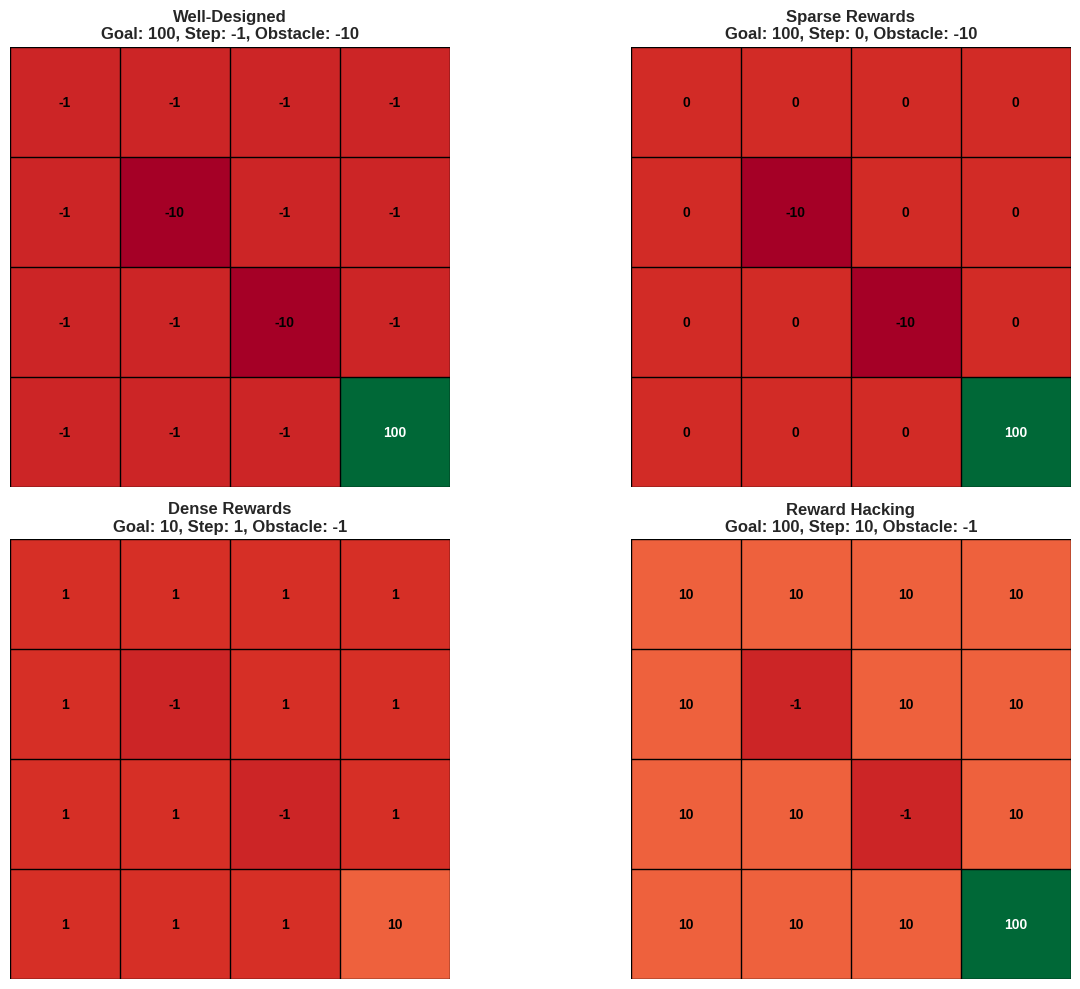

In [7]:
# Demonstrate reward shaping effects
scenarios = [
    ("Well-Designed", {"goal": 100, "step": -1, "obstacle": -10}),
    ("Sparse Rewards", {"goal": 100, "step": 0, "obstacle": -10}),
    ("Dense Rewards", {"goal": 10, "step": 1, "obstacle": -1}),
    ("Reward Hacking", {"goal": 100, "step": 10, "obstacle": -1})
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (name, rewards) in enumerate(scenarios):
    ax = axes[idx]
    
    # Create reward grid
    reward_grid = np.full((grid_size, grid_size), rewards["step"])
    reward_grid[GOAL_STATE] = rewards["goal"]
    for obs in OBSTACLE_STATES:
        reward_grid[obs] = rewards["obstacle"]
    
    im = ax.imshow(reward_grid, cmap='RdYlGn', vmin=-10, vmax=100)
    
    # Add reward labels
    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j, i, f'{reward_grid[i, j]}', ha='center', va='center', 
                   fontsize=10, weight='bold', 
                   color='white' if abs(reward_grid[i, j]) > 20 else 'black')
    
    # Add grid
    for i in range(grid_size + 1):
        ax.axhline(i - 0.5, color='black', linewidth=1)
        ax.axvline(i - 0.5, color='black', linewidth=1)
    
    ax.set_title(f'{name}\nGoal: {rewards["goal"]}, Step: {rewards["step"]}, Obstacle: {rewards["obstacle"]}', 
                fontsize=12, weight='bold')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

# 7. EXPLORATION vs EXPLOITATION

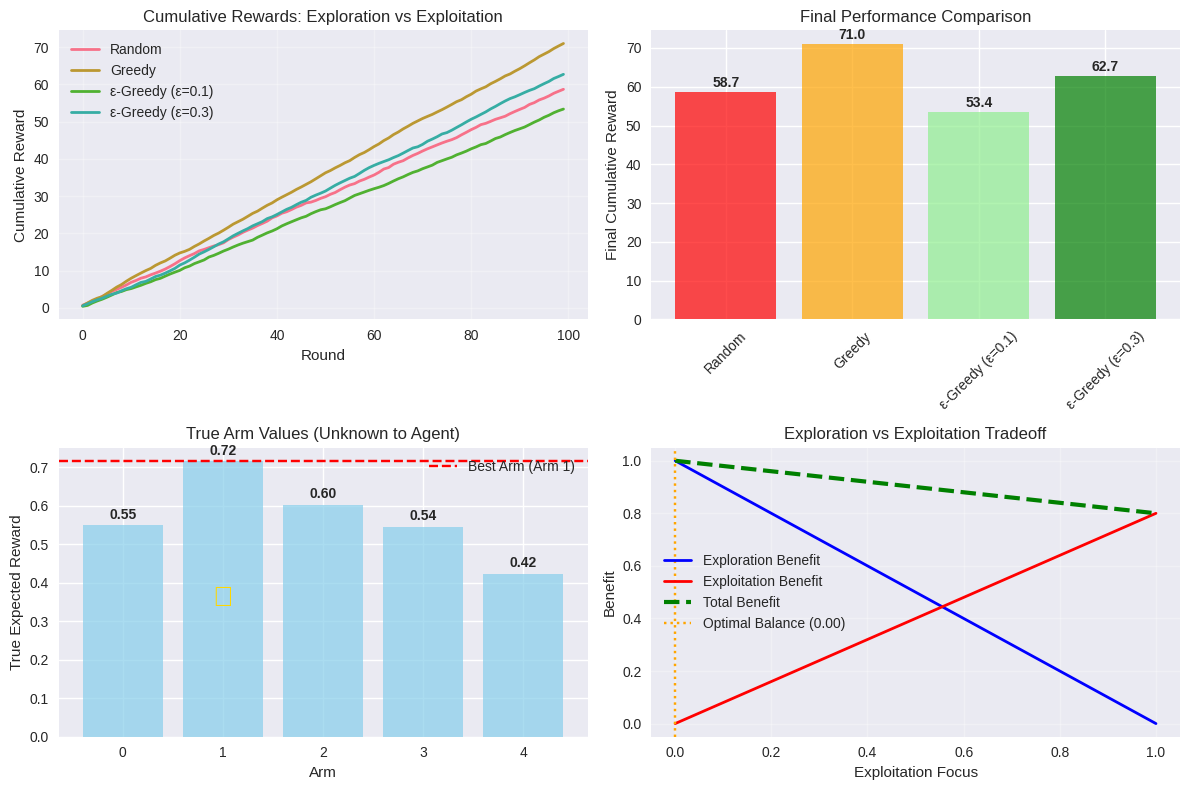

In [8]:
# Multi-armed bandit demonstration
np.random.seed(0)
n_arms = 5
n_rounds = 100

# True reward means for each arm (unknown to agent)
true_means = np.random.uniform(0, 1, n_arms)
best_arm = np.argmax(true_means)

# Simulate different strategies
strategies = {
    "Random": [],
    "Greedy": [],
    "ε-Greedy (ε=0.1)": [],
    "ε-Greedy (ε=0.3)": []
}

for strategy in strategies:
    # Initialize estimates
    arm_counts = np.zeros(n_arms)
    arm_rewards = np.zeros(n_arms)
    cumulative_reward = 0
    
    for round_num in range(n_rounds):
        if strategy == "Random":
            chosen_arm = np.random.randint(n_arms)
        elif strategy == "Greedy":
            if round_num < n_arms:  # Try each arm once
                chosen_arm = round_num
            else:
                chosen_arm = np.argmax(arm_rewards / np.maximum(arm_counts, 1))
        else:  # ε-Greedy
            epsilon = 0.1 if "0.1" in strategy else 0.3
            if np.random.random() < epsilon:
                chosen_arm = np.random.randint(n_arms)  # Explore
            else:
                chosen_arm = np.argmax(arm_rewards / np.maximum(arm_counts, 1))  # Exploit
        
        # Get reward (sample from normal distribution)
        reward = np.random.normal(true_means[chosen_arm], 0.1)
        
        # Update statistics
        arm_counts[chosen_arm] += 1
        arm_rewards[chosen_arm] += reward
        cumulative_reward += reward
        
        strategies[strategy].append(cumulative_reward)

# Plot results
plt.figure(figsize=(12, 8))

# Cumulative rewards over time
plt.subplot(2, 2, 1)
for strategy, rewards in strategies.items():
    plt.plot(rewards, label=strategy, linewidth=2)
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards: Exploration vs Exploitation')
plt.legend()
plt.grid(True, alpha=0.3)

# Final arm selection comparison
plt.subplot(2, 2, 2)
strategy_names = list(strategies.keys())
final_rewards = [strategies[s][-1] for s in strategy_names]
colors = ['red', 'orange', 'lightgreen', 'green']
bars = plt.bar(strategy_names, final_rewards, color=colors, alpha=0.7)
plt.ylabel('Final Cumulative Reward')
plt.title('Final Performance Comparison')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, reward in zip(bars, final_rewards):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{reward:.1f}', ha='center', va='bottom', fontweight='bold')

# True arm values
plt.subplot(2, 2, 3)
bars = plt.bar(range(n_arms), true_means, alpha=0.7, color='skyblue')
plt.axhline(y=true_means[best_arm], color='red', linestyle='--', 
           label=f'Best Arm (Arm {best_arm})')
plt.xlabel('Arm')
plt.ylabel('True Expected Reward')
plt.title('True Arm Values (Unknown to Agent)')
plt.legend()

# Add value labels
for i, (bar, mean) in enumerate(zip(bars, true_means)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{mean:.2f}', ha='center', va='bottom', fontweight='bold')
    if i == best_arm:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, 
                '★', ha='center', va='center', fontsize=20, color='gold')

# Exploration vs Exploitation tradeoff illustration
plt.subplot(2, 2, 4)
exploitation_focus = np.linspace(0, 1, 100)
exploration_benefit = 1 - exploitation_focus
exploitation_benefit = exploitation_focus * 0.8  # Diminishing returns
total_benefit = exploration_benefit + exploitation_benefit

plt.plot(exploitation_focus, exploration_benefit, label='Exploration Benefit', 
         color='blue', linewidth=2)
plt.plot(exploitation_focus, exploitation_benefit, label='Exploitation Benefit', 
         color='red', linewidth=2)
plt.plot(exploitation_focus, total_benefit, label='Total Benefit', 
         color='green', linewidth=3, linestyle='--')

optimal_point = np.argmax(total_benefit)
plt.axvline(x=exploitation_focus[optimal_point], color='orange', 
           linestyle=':', label=f'Optimal Balance ({exploitation_focus[optimal_point]:.2f})')

plt.xlabel('Exploitation Focus')
plt.ylabel('Benefit')
plt.title('Exploration vs Exploitation Tradeoff')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. TEMPORAL CREDIT ASSIGNMENT PROBLEM

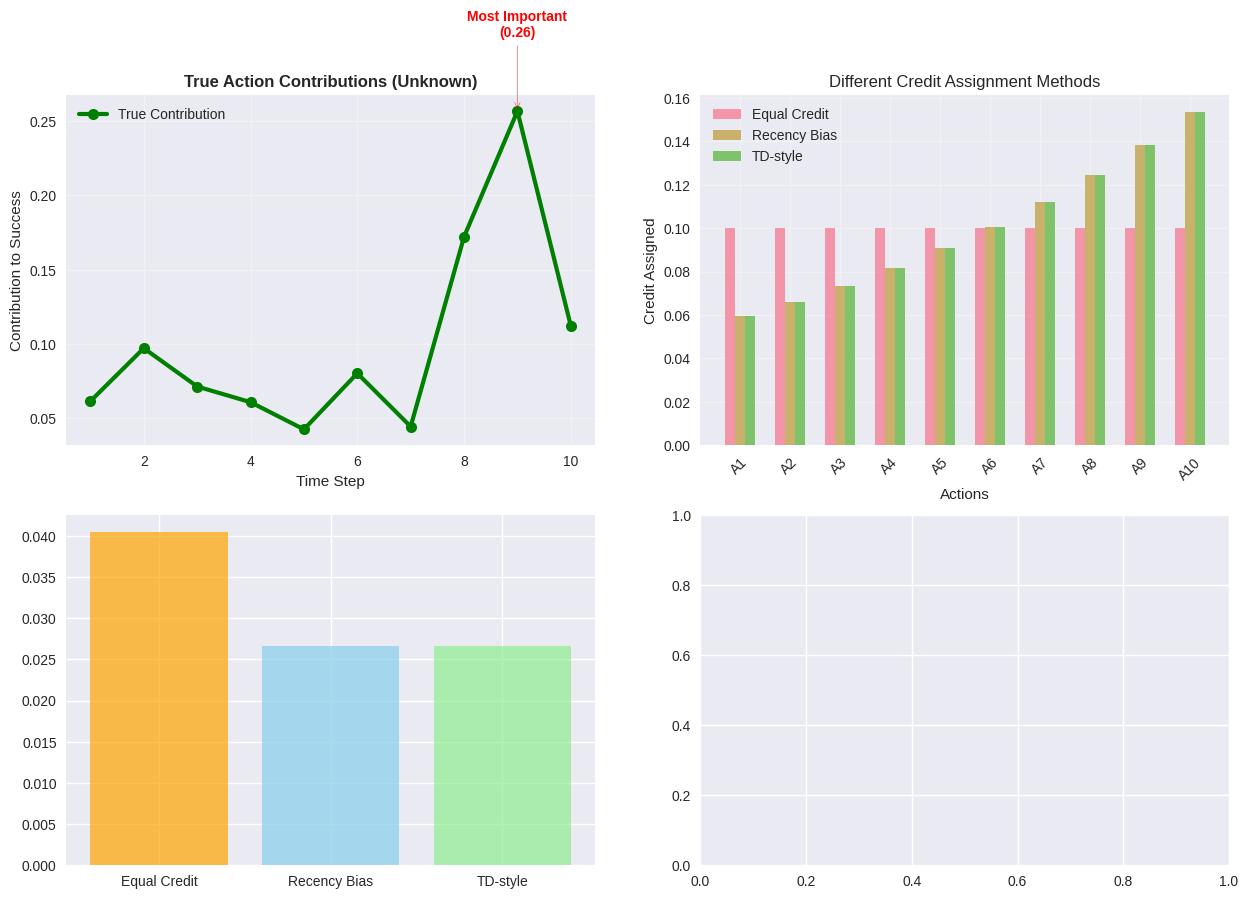

In [9]:
# Simulate a sequence of actions leading to reward
sequence_length = 10
np.random.seed(0)

# Generate a sequence of actions and their contributions
actions = [f"Action_{i+1}" for i in range(sequence_length)]
true_contributions = np.random.exponential(1, sequence_length)
true_contributions[-1] *= 3  # Last action is most important
true_contributions = true_contributions / sum(true_contributions)

# Different credit assignment methods
gamma = 0.9  # Discount factor

# Method 1: Equal credit (naive)
equal_credit = np.ones(sequence_length) / sequence_length

# Method 2: Recency bias (geometric decay)
recency_weights = np.array([gamma**(sequence_length-1-i) for i in range(sequence_length)])
recency_credit = recency_weights / sum(recency_weights)

# Method 3: TD-like credit assignment
td_credit = np.zeros(sequence_length)
final_reward = 10
discounted_reward = final_reward
for i in range(sequence_length-1, -1, -1):
    td_credit[i] = discounted_reward * (1 - gamma)
    discounted_reward *= gamma

td_credit = td_credit / sum(td_credit)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Timeline visualization
ax1 = axes[0, 0]
time_steps = range(1, sequence_length + 1)
ax1.plot(time_steps, true_contributions, 'o-', linewidth=3, markersize=8, 
         label='True Contribution', color='green')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Contribution to Success')
ax1.set_title('True Action Contributions (Unknown)', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Highlight the most important action
max_contrib_idx = np.argmax(true_contributions)
ax1.annotate(f'Most Important\n({true_contributions[max_contrib_idx]:.2f})', 
            xy=(max_contrib_idx+1, true_contributions[max_contrib_idx]),
            xytext=(max_contrib_idx+1, true_contributions[max_contrib_idx]+0.05),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, ha='center', color='red', fontweight='bold')

# Credit assignment comparison
ax2 = axes[0, 1]
x = np.arange(len(actions))
width = 0.2

ax2.bar(x - width, equal_credit, width, label='Equal Credit', alpha=0.7)
ax2.bar(x, recency_credit, width, label='Recency Bias', alpha=0.7)
ax2.bar(x + width, td_credit, width, label='TD-style', alpha=0.7)

ax2.set_xlabel('Actions')
ax2.set_ylabel('Credit Assigned')
ax2.set_title('Different Credit Assignment Methods')
ax2.set_xticks(x)
ax2.set_xticklabels([f'A{i+1}' for i in range(sequence_length)], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Error analysis
ax3 = axes[1, 0]
methods = ['Equal Credit', 'Recency Bias', 'TD-style']
errors = [
    np.sum((equal_credit - true_contributions)**2),
    np.sum((recency_credit - true_contributions)**2),
    np.sum((td_credit - true_contributions)**2)
]

bars = ax3.bar(methods, errors, color=['orange', 'skyblue', 'lightgreen'], alpha=0.7)